In [22]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import seaborn as sns
from sklearn import metrics
from keras.preprocessing import image
from PIL import Image
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator, load_img

In [23]:
print(os.listdir("data"))


['test', 'train', 'val']


In [24]:
# split_folders.ratio('data', output="output_data", seed=1337, ratio=(.65, .20, .15))

In [25]:
traindata = ImageDataGenerator(rescale=1./255)
testdata = ImageDataGenerator(rescale=1./255)

In [26]:
trainingdata = traindata.flow_from_directory('data/train',
                                             batch_size=32,
                                             target_size=(64,64),
                                             class_mode=('binary') 
                                            )
validation_generator = testdata.flow_from_directory('data/val',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

test_set = testdata.flow_from_directory('data/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 33 images belonging to 7 classes.
Found 11 images belonging to 7 classes.
Found 15 images belonging to 7 classes.


In [45]:
cnn = Sequential()

cnn.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (64, 64, 3)))
cnn.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
cnn.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
cnn.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
cnn.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())
cnn.add(Dense(256, activation = "relu"))
cnn.add(Dropout(0.5))
cnn.add(Dense(activation = 'relu', units = 1))

cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [46]:
cnn_model = cnn.fit_generator(trainingdata,
                         steps_per_epoch = 100,
                         epochs = 3,
                         validation_steps = 150)

Epoch 1/3
 81/100 [=======================>......] - ETA: 7s - loss: -29.6112 - acc: 0.0174

KeyboardInterrupt: 

In [33]:
test_accu = cnn.evaluate_generator(test_set,steps=500)

print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 13.333334028720856 %


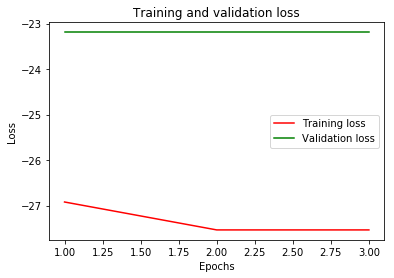

In [34]:
loss = cnn_model.history['loss']
val_loss = cnn_model.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

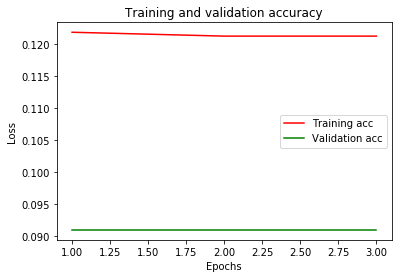

In [35]:

acc = cnn_model.history['acc']
val_acc = cnn_model.history['val_acc']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [36]:
print(os.listdir("data1/test/cars"))

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'data1/test/cars'

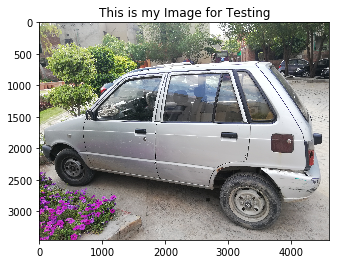

In [28]:
test_image = image.load_img('data1/test/cars/IMG_20190524_153054_2.jpg')
plt.imshow(test_image)
plt.title('This is my Image for Testing')
test_image = test_image.resize((64, 64), Image.ANTIALIAS)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

In [29]:
img=cnn.predict(test_image)

In [31]:
if img[0][0]==1:
    print("car")
else:
    print("bike")

car


In [32]:
img

array([[1.]], dtype=float32)

In [33]:
print(os.listdir("data1/test/bikes"))

['IMG_20190524_153813.jpg', 'IMG_20190524_153826_1.jpg', 'IMG_20190524_153814.jpg', 'IMG_20190524_153752.jpg', 'IMG_20190524_153810.jpg', 'IMG_20190524_153827.jpg', 'IMG_20190524_153832.jpg', 'IMG_20190524_153828.jpg', 'IMG_20190524_153825.jpg']


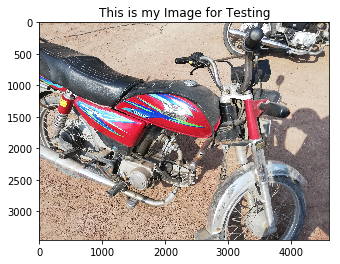

In [34]:
test_image = image.load_img('data1/test/bikes/IMG_20190524_153825.jpg')
plt.imshow(test_image)
plt.title('This is my Image for Testing')
test_image = test_image.resize((64, 64), Image.ANTIALIAS)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

In [35]:
img=cnn.predict(test_image)

In [37]:
if img[0][0]==1:
    print("car")
else:
    print("bike")

bike


In [38]:
img

array([[0.]], dtype=float32)